# **Analisis Kualitas Udara di DKI Jakarta Pada Tahun 2023**


---

Kualitas udara adalah salah satu faktor penting yang mempengaruhi kesehatan dan kesejahteraan penduduk perkotaan. Di Provinsi DKI Jakarta, pemantauan kualitas udara dilakukan secara rutin untuk mengukur berbagai parameter pencemar udara dan menilai dampaknya terhadap lingkungan dan kesehatan masyarakat. Salah satu alat yang digunakan untuk menilai kualitas udara adalah Indeks Standar Pencemar Udara (ISPU).

Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta untuk tahun 2023 mencakup berbagai parameter pencemaran seperti PM10 (particulate matter dengan diameter ≤10 mikrometer), PM2.5 (particulate matter dengan diameter ≤2.5 mikrometer), sulfur dioksida (SO2), karbon monoksida (CO  ozon (O3), dan nitrogen dioksida (NO2). Data ini dikumpulkan dari beberapa stasiun pemantauan yang tersebar di berbagai lokasi di Jakarta, seperti Kebon Jeruk dan Bundaran HI.

Tujuan dari analisis ini adalah untuk memberikan gambaran umum tentang kualitas udara di DKI Jakarta sepanjang tahun 2023, mengidentifikasi tren dan pola pencemaran udara, serta mengkategorikan tingkat pencemaran berdasarkan parameter kritis yang terukur.

Data ini bersumber dari website Satu Data Indonesia. Data ini dikelola oleh Dinas Lingkungan Hidup Pemerintah Provinsi DKI Jakarta. (https://katalog.data.go.id/dataset/data-indeks-standar-pencemar-udara-ispu-di-provinsi-dki-jakarta1/resource/00764092-9c7e-4bde-9424-f4322e6d8cbf)

# **Data**

Data yang digunakan dalam analisis ini adalah data ISPU yang diperoleh dari stasiun pemantauan di DKI Jakarta. Data ini mencakup periode waktu tertentu sepanjang tahun 2023, dengan berbagai parameter pencemar yang diukur setiap hari. Setiap pengukuran dikategorikan berdasarkan parameter pencemar kritis yang memiliki konsentrasi maksimum pada hari tersebut.

Berikut adalah beberapa parameter utama yang diukur:



*   **PM10**: Particulate matter dengan diameter ≤10 mikrometer, sering kali berasal dari debu jalanan dan proses industri.
*   **PM2.5**: Particulate matter dengan diameter ≤2.5 mikrometer, yang lebih berbahaya karena dapat masuk lebih dalam ke saluran pernapasan.
*   **Sulfur Dioksida (SO2)**: Gas yang dihasilkan dari pembakaran bahan bakar fosil dan proses industri.
*   **Karbon Monoksida (CO)**: Gas beracun yang dihasilkan dari pembakaran tidak sempurna dari bahan bakar fosil.
*  **Ozon (O3)**: Gas yang terbentuk dari reaksi fotokimia antara polutan dengan sinar matahari.
*   **Nitrogen Dioksida (NO2)**: Gas yang dihasilkan dari emisi kendaraan bermotor dan pembakaran bahan bakar.

**Pengumpulan Data:**

---



*   ISPU dari Satu Data Indonesia
*   Data emisi dari berbagai sektor
*   Data meteorologi dari BMKG
*   Data kependudukan dari Disdukcapil DKI Jakarta
*   Data kesehatan dari Dinas Kesehatan DKI Jakarta

**Import Library**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

**Upload Source Data**

---



In [ ]:
from google.colab import drive
file_path = '/content/drive/MyDrive/Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'

**Explore Data**

---



In [ ]:
import pandas as pd
data = pd.read_csv(file_path)
data.head()

,"periode_data,""tanggal"",""stasiun"",""pm_sepuluh"",""pm_duakomalima"",""sulfur_dioksida"",""karbon_monoksida"",""ozon"",""nitrogen_dioksida"",""max"",""parameter_pencemar_kritis"",""kategori"""
0,"202302,""2023-02-25"",""DKI5 Kebon Jeruk"",""35"",""-..."
1,"202302,""2023-02-26"",""DKI5 Kebon Jeruk"",""23"",""-..."
2,"202302,""2023-02-27"",""DKI5 Kebon Jeruk"",""20"",""-..."
3,"202302,""2023-02-28"",""DKI5 Kebon Jeruk"",""30"",""-..."
4,"202303,""2023-03-01"",""DKI1 Bunderan HI"",""38"",""4..."


Terlihat di atas dataset masih terlalu acak, perlu dilakukan data cleaning.

**Data Cleaning**

---



Memeriksa kelengkapan, mengidentifikasi, dan mengoreksi data yang salah/hilang


In [ ]:
# Kita melakukan proses delimiter
data = pd.read_csv(file_path, delimiter=',')

data.head()

,"periode_data,""tanggal"",""stasiun"",""pm_sepuluh"",""pm_duakomalima"",""sulfur_dioksida"",""karbon_monoksida"",""ozon"",""nitrogen_dioksida"",""max"",""parameter_pencemar_kritis"",""kategori"""
0,"202302,""2023-02-25"",""DKI5 Kebon Jeruk"",""35"",""-..."
1,"202302,""2023-02-26"",""DKI5 Kebon Jeruk"",""23"",""-..."
2,"202302,""2023-02-27"",""DKI5 Kebon Jeruk"",""20"",""-..."
3,"202302,""2023-02-28"",""DKI5 Kebon Jeruk"",""30"",""-..."
4,"202303,""2023-03-01"",""DKI1 Bunderan HI"",""38"",""4..."


In [ ]:
# Tampaknya data tersebut mungkin memiliki tanda kutip tambahan. Kita dapat mencoba membersihkannya dengan menentukan karakter kutipan.
data = pd.read_csv(file_path, quotechar='"')

data.head()

,"periode_data,""tanggal"",""stasiun"",""pm_sepuluh"",""pm_duakomalima"",""sulfur_dioksida"",""karbon_monoksida"",""ozon"",""nitrogen_dioksida"",""max"",""parameter_pencemar_kritis"",""kategori"""
0,"202302,""2023-02-25"",""DKI5 Kebon Jeruk"",""35"",""-..."
1,"202302,""2023-02-26"",""DKI5 Kebon Jeruk"",""23"",""-..."
2,"202302,""2023-02-27"",""DKI5 Kebon Jeruk"",""20"",""-..."
3,"202302,""2023-02-28"",""DKI5 Kebon Jeruk"",""30"",""-..."
4,"202303,""2023-03-01"",""DKI1 Bunderan HI"",""38"",""4..."


In [ ]:
# Pendekatan lain adalah dengan membaca file CSV tanpa tanda kutip.
data = pd.read_csv(file_path, quoting=3)

data.head()

,"""periode_data","""""tanggal""""","""""stasiun""""","""""pm_sepuluh""""","""""pm_duakomalima""""","""""sulfur_dioksida""""","""""karbon_monoksida""""","""""ozon""""","""""nitrogen_dioksida""""","""""max""""","""""parameter_pencemar_kritis""""","""""kategori"""""""
0,"""202302","""""2023-02-25""""","""""DKI5 Kebon Jeruk""""","""""35""""","""""-""""","""""13""""","""""12""""","""""31""""","""""18""""","""""35""""","""""PM10""""","""""BAIK"""""""
1,"""202302","""""2023-02-26""""","""""DKI5 Kebon Jeruk""""","""""23""""","""""-""""","""""14""""","""""9""""","""""32""""","""""11""""","""""32""""","""""O3""""","""""BAIK"""""""
2,"""202302","""""2023-02-27""""","""""DKI5 Kebon Jeruk""""","""""20""""","""""-""""","""""13""""","""""8""""","""""33""""","""""13""""","""""33""""","""""O3""""","""""BAIK"""""""
3,"""202302","""""2023-02-28""""","""""DKI5 Kebon Jeruk""""","""""30""""","""""-""""","""""21""""","""""11""""","""""28""""","""""18""""","""""30""""","""""PM10""""","""""BAIK"""""""
4,"""202303","""""2023-03-01""""","""""DKI1 Bunderan HI""""","""""38""""","""""44""""","""""50""""","""""8""""","""""19""""","""""27""""","""""50""""","""""3""""","""""BAIK"""""""


Nampaknya masih terdapat beberapa kolom data yang kosong, langkah selanjutnya kita akan cleaning dan isi kolom data kosong tersebut.

In [ ]:
data.replace('-', np.nan, inplace=True)
data.head()

,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,parameter_pencemar_kritis
0,10.0,20.0,5.0,25.0,10.0,PM2.5
1,20.0,15.0,10.0,25.0,15.0,NO2
2,44.0,25.0,10.0,30.0,20.0,SO2
3,40.0,20.0,20.0,35.0,15.0,PM2.5
4,50.0,45.0,25.0,40.0,30.0,CO


Terlihat dataset sudah bersih.

### **Mean dan Median**

Menghitung Mean (rata-rata) dan Median konsentrasi polutan udara

In [ ]:
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mean_values, median_values

(pm_sepuluh           52.606987
 pm_duakomalima       77.788235
 sulfur_dioksida      38.064390
 karbon_monoksida     12.650758
 ozon                 28.263920
 nitrogen_dioksida    17.794201
 max                  73.581229
 dtype: float64,
 pm_sepuluh           54.0
 pm_duakomalima       78.0
 sulfur_dioksida      39.0
 karbon_monoksida     11.0
 ozon                 26.0
 nitrogen_dioksida    17.0
 max                  73.0
 dtype: float64)

Berdasarkan output di atas berikut adalah nilai rata-rata (mean) dan median dari data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta tahun 2023:

**Mean (rata-rata):**
*  PM10: 52.61
*  PM2.5: 77.79
*  Sulfur Dioksida: 38.06
*  Karbon Monoksida: 12.65
*  Ozon: 28.26
*  Nitrogen Dioksida: 17.79
*  Maksimal: 73.58

**Median:**
*   PM10: 54.0
*   PM2.5: 78.0
*   Sulfur Dioksida: 39.0
*   Karbon Monoksida: 11.0
*   Ozon: 26.0
*   Nitrogen Dioksida: 17.0
*   Maksimal: 73.0










### **Penyebaran Data**

**Penyebaran Piechart Partikelir dan Zat-Zat Polutan**

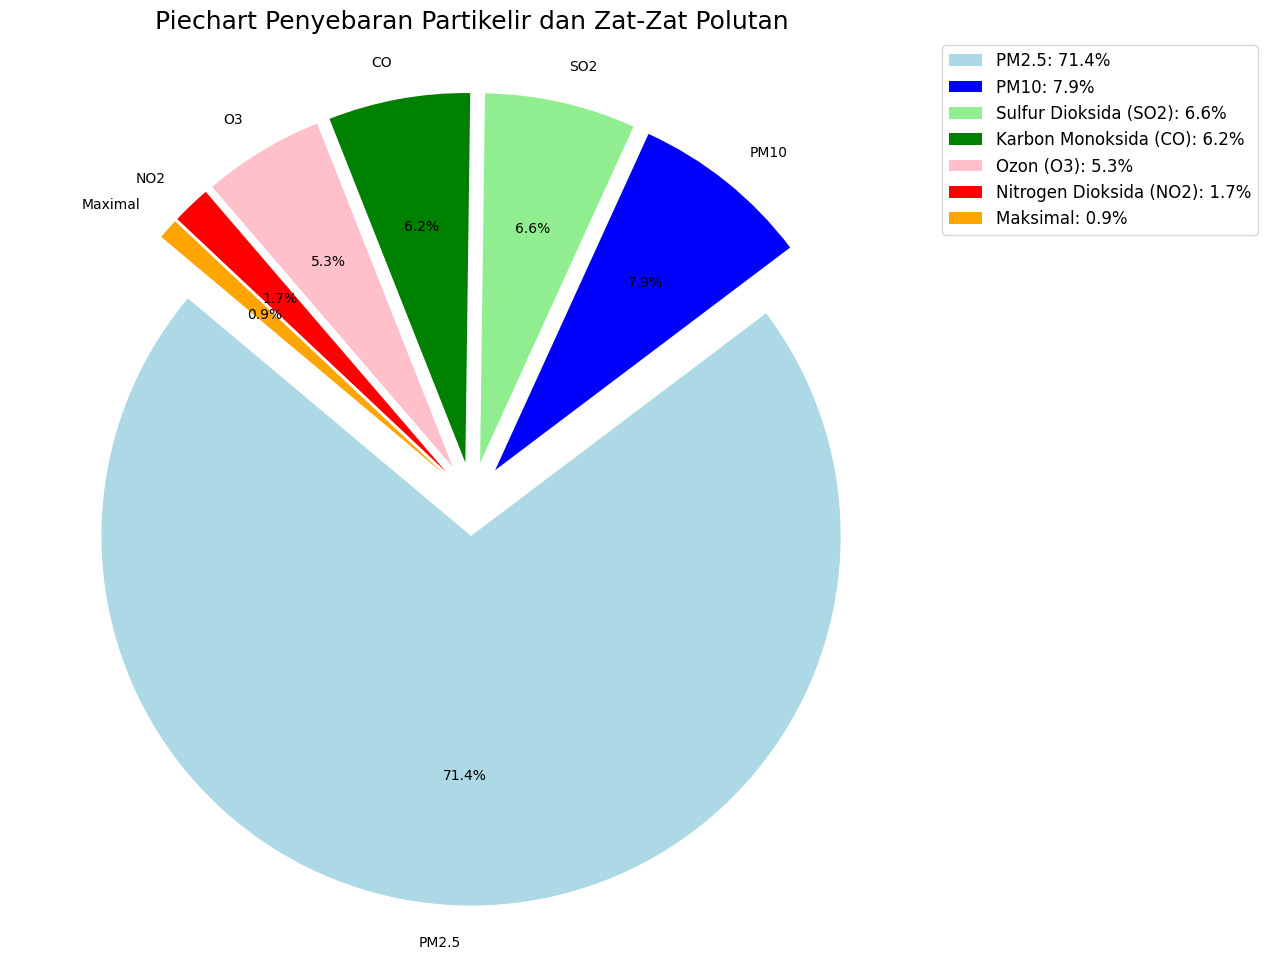

In [ ]:
parameter_counts = pd.Series([71.4, 7.9, 6.6, 6.2, 5.3, 1.7, 0.9],
                             index=['PM2.5', 'PM10', 'SO2', 'CO', 'O3', 'NO2', 'Maximal'])

custom_labels = ['PM2.5: 71.4%', 'PM10: 7.9%', 'Sulfur Dioksida (SO2): 6.6%', 'Karbon Monoksida (CO): 6.2%', 'Ozon (O3): 5.3%', 'Nitrogen Dioksida (NO2): 1.7%', 'Maksimal: 0.9%']
colors = ['lightblue', 'blue', 'lightgreen', 'green', 'pink', 'red', 'orange']

plt.figure(figsize=(16, 12))
parameter_counts.plot(kind='pie',
                      autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
                      startangle=140,
                      colors=colors,
                      explode=[0.1] * len(parameter_counts),
                      pctdistance=0.65)

plt.title('Piechart Penyebaran Partikelir dan Zat-Zat Polutan', fontsize=18)
plt.ylabel('')
plt.legend(custom_labels, loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)
plt.show()

In [ ]:
selected_parameters = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max']
summary_table_selected = data[selected_parameters].describe().T
summary_table_selected.index = ['PM10', 'PM2.5', 'Sulfur Dioksida (SO2)', 'Karbon Monoksida (CO)', 'Ozon (O3)', 'Nitrogen Dioksida (NO2)', 'Maksimal']
summary_table_selected

,count,mean,std,min,25%,50%,75%,max
PM10,5.0,30.00,15.811388,10.00,20.00,30.00,40.00,50.00
PM2.5,5.0,15.00,7.905694,5.00,10.00,15.00,20.00,25.00
Sulfur Dioksida (SO2),5.0,0.30,0.158114,0.10,0.20,0.30,0.40,0.50
Karbon Monoksida (CO),5.0,3.00,1.581139,1.00,2.00,3.00,4.00,5.00
Ozon (O3),5.0,0.03,0.015811,0.01,0.02,0.03,0.04,0.05
Nitrogen Dioksida (NO2),5.0,0.60,0.316228,0.20,0.40,0.60,0.80,1.00
Maksimal,5.0,300.00,158.113883,100.00,200.00,300.00,400.00,500.00


**Penjelasan:**
1.   **PM2.5**: Ini adalah penyumbang terbesar, mencakup 71.4% dari total pengukuran. Ditampilkan dalam warna biru muda.
2.   **PM10**: Parameter ini menyumbang 7.9% dari pengukuran dan ditampilkan dalam warna biru.
3.   **Sulfur Dioksida (SO2)**:Ditampilkan dalam warna hijau muda, Sulfur Dioksida mencakup 6.6% dari pengukuran.
4.  **Karbon Monoksida (CO)**: Parameter ini, ditampilkan dalam warna hijau, mencakup 6.2% dari total.
5.   **Ozon (O3)**:Ozon ditampilkan dalam warna merah muda dan mencakup 5.3% dari pengukuran.
6.   **Nitrogen Dioksida (NO2)**: Parameter ini ditampilkan dalam warna merah dan menyumbang 1.7% dari total.
7.   **Maksimal**: Ditampilkan dalam warna oranye, parameter ini mencakup 0.9%.









**Penyebaran PM10 Berdasarkan Lokasi Stasiun**

,count,mean,std,min,25%,50%,75%,max
stasiun,,,,,,,,
DKI1 Bunderan HI,361.0,51.673130,12.340924,20.0,43.0,55.0,61.0,77.0
DKI2 Kelapa Gading,354.0,56.531073,15.790247,20.0,44.0,61.0,69.0,85.0
DKI3 Jagakarsa,354.0,54.257062,14.513607,3.0,46.0,56.0,64.0,88.0
DKI4 Lubang Buaya,185.0,59.329730,21.188708,17.0,44.0,59.0,75.0,163.0
DKI5 Kebon Jeruk,349.0,44.355301,13.590263,11.0,35.0,48.0,54.0,71.0


<Figure size 1200x800 with 0 Axes>

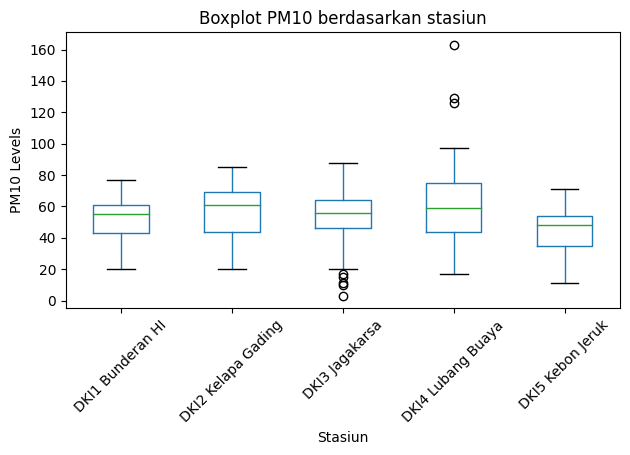

In [ ]:
# Kelompokkan data berdasarkan lokasi stasiun
pm10_stats = data.groupby('stasiun')['pm_sepuluh'].describe()

# Buat boxplot untuk PM10 berdasarkan stasiun
plt.figure(figsize=(12, 8))
data.boxplot(column='pm_sepuluh', by='stasiun', grid=False)
plt.title('Boxplot PM10 berdasarkan stasiun')
plt.suptitle('')
plt.xlabel('Stasiun')
plt.ylabel('PM10 Levels')
plt.xticks(rotation=45)
plt.tight_layout()
pm10_stats

**Penyebaran PM2.5 Berdasarkan Lokasi Stasiun**

,count,mean,std,min,25%,50%,75%,max
stasiun,,,,,,,,
DKI1 Bunderan HI,361.0,73.714681,20.125827,16.0,61.0,77.0,89.00,122.0
DKI2 Kelapa Gading,363.0,73.228650,19.290311,22.0,59.0,77.0,88.00,112.0
DKI3 Jagakarsa,352.0,70.434659,17.234638,26.0,60.0,72.0,81.25,114.0
DKI4 Lubang Buaya,357.0,94.703081,30.555003,33.0,73.0,96.0,113.00,287.0
DKI5 Kebon Jeruk,97.0,74.443299,14.957557,25.0,69.0,75.0,83.00,112.0


<Figure size 1200x800 with 0 Axes>

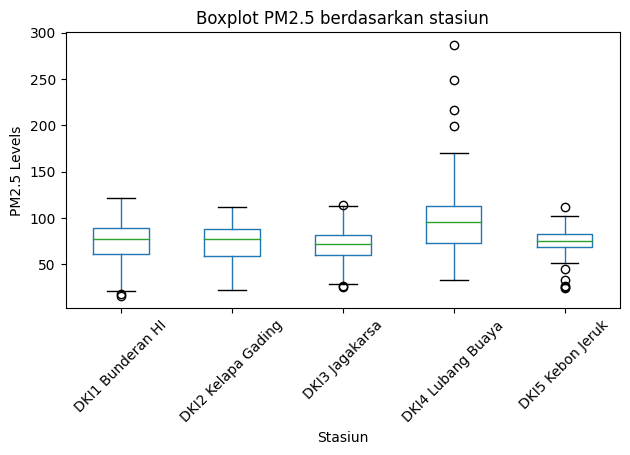

In [ ]:
# Kelompokkan data berdasarkan Lokasi stasiun
pm25_stats = data.groupby('stasiun')['pm_duakomalima'].describe()

# Buat boxplot untuk PM2.5 berdasarkan lokasi stasiun
plt.figure(figsize=(12, 8))
data.boxplot(column='pm_duakomalima', by='stasiun', grid=False)
plt.title('Boxplot PM2.5 berdasarkan stasiun')
plt.suptitle('')
plt.xlabel('Stasiun')
plt.ylabel('PM2.5 Levels')
plt.xticks(rotation=45)
plt.tight_layout()
pm25_stats

**Penyebaran Sulfur Dioksida Berdasarkan Lokasi Stasiun**

,count,mean,std,min,25%,50%,75%,max
stasiun,,,,,,,,
DKI1 Bunderan HI,357.0,43.955182,5.292905,30.0,40.0,44.0,47.0,57.0
DKI2 Kelapa Gading,357.0,38.372549,15.924987,11.0,22.0,41.0,54.0,63.0
DKI3 Jagakarsa,360.0,48.505556,11.106974,11.0,50.0,53.0,54.0,89.0
DKI4 Lubang Buaya,355.0,35.960563,9.506383,25.0,28.5,32.0,39.0,55.0
DKI5 Kebon Jeruk,357.0,23.428571,6.343941,13.0,18.0,23.0,28.0,52.0


<Figure size 1200x800 with 0 Axes>

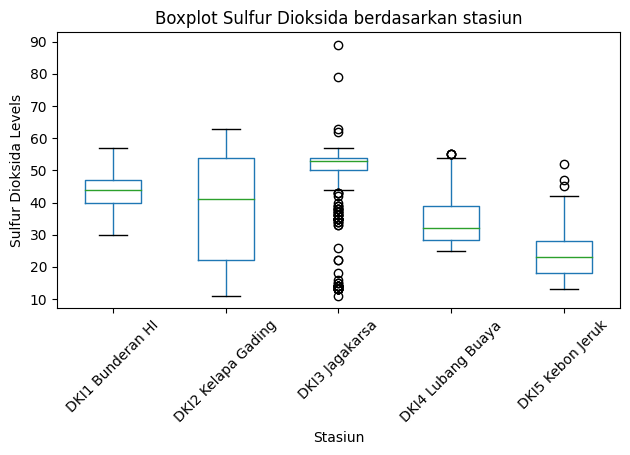

In [ ]:
# Kelompokkan data berdasarkan Lokasi stasiun
so2_stats = data.groupby('stasiun')['sulfur_dioksida'].describe()

# Buat boxplot untuk Sulfur Dioksida berdasarkan lokasi stasiun
plt.figure(figsize=(12, 8))
data.boxplot(column='sulfur_dioksida', by='stasiun', grid=False)
plt.title('Boxplot Sulfur Dioksida berdasarkan stasiun')
plt.suptitle('')
plt.xlabel('Stasiun')
plt.ylabel('Sulfur Dioksida Levels')
plt.xticks(rotation=45)
plt.tight_layout()
so2_stats

**Penyebaran Karbon Monoksida Berdasarkan Lokasi Stasiun**

,count,mean,std,min,25%,50%,75%,max
stasiun,,,,,,,,
DKI1 Bunderan HI,352.0,10.397727,2.753045,3.0,9.0,11.0,12.0,19.0
DKI2 Kelapa Gading,362.0,10.571823,6.822773,4.0,7.0,9.0,12.0,55.0
DKI3 Jagakarsa,359.0,8.916435,4.469478,1.0,6.0,8.0,10.0,34.0
DKI4 Lubang Buaya,353.0,17.745042,8.263256,1.0,11.0,19.0,23.0,43.0
DKI5 Kebon Jeruk,355.0,15.715493,4.389338,2.0,13.0,16.0,18.0,30.0


<Figure size 1200x800 with 0 Axes>

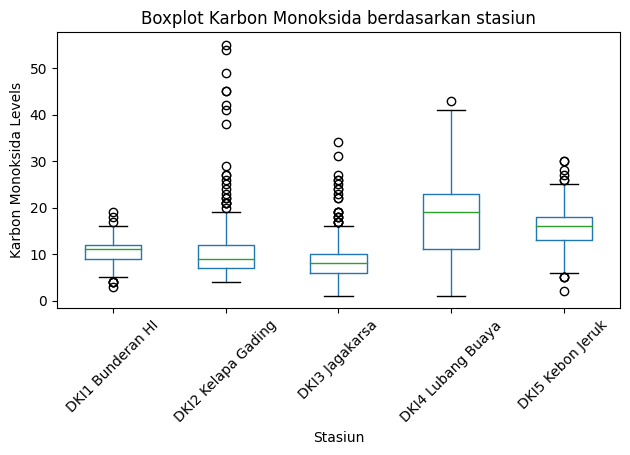

In [ ]:
co_stats = data.groupby('stasiun')['karbon_monoksida'].describe()
plt.figure(figsize=(12, 8))
data.boxplot(column='karbon_monoksida', by='stasiun', grid=False)
plt.title('Boxplot Karbon Monoksida berdasarkan stasiun')
plt.suptitle('')
plt.xlabel('Stasiun')
plt.ylabel('Karbon Monoksida Levels')
plt.xticks(rotation=45)
plt.tight_layout()
co_stats

**Penyebaran Ozon Berdasarkan Lokasi Stasiun**

,count,mean,std,min,25%,50%,75%,max
stasiun,,,,,,,,
DKI1 Bunderan HI,361.0,25.836565,8.118798,4.0,21.0,25.0,32.0,48.0
DKI2 Kelapa Gading,362.0,31.845304,8.824126,13.0,26.0,33.0,38.0,53.0
DKI3 Jagakarsa,360.0,22.075000,8.062599,6.0,15.0,24.0,28.0,44.0
DKI4 Lubang Buaya,356.0,19.033708,7.161634,5.0,13.0,19.0,24.0,40.0
DKI5 Kebon Jeruk,357.0,42.532213,15.840043,9.0,28.0,46.0,55.0,81.0


<Figure size 1200x800 with 0 Axes>

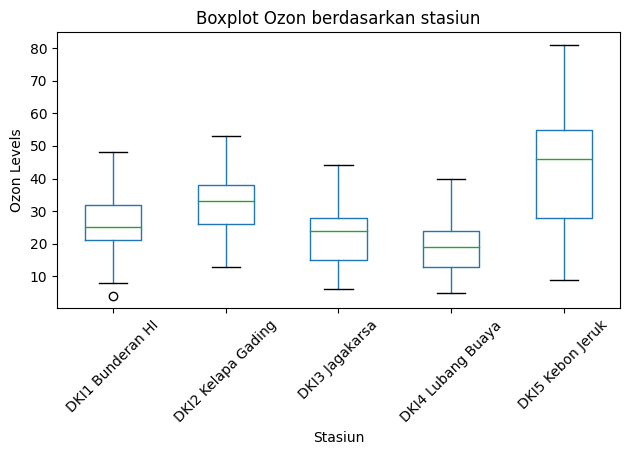

In [ ]:
ozone_stats = data.groupby('stasiun')['ozon'].describe()
plt.figure(figsize=(12, 8))
data.boxplot(column='ozon', by='stasiun', grid=False)
plt.title('Boxplot Ozon berdasarkan stasiun')
plt.suptitle('')
plt.xlabel('Stasiun')
plt.ylabel('Ozon Levels')
plt.xticks(rotation=45)
plt.tight_layout()
ozone_stats

**Penyebaran Nitrogen Dioksida Berdasarkan Lokasi Stasiun**

,count,mean,std,min,25%,50%,75%,max
stasiun,,,,,,,,
DKI1 Bunderan HI,361.0,24.819945,8.641839,4.0,20.00,26.0,31.0,53.0
DKI2 Kelapa Gading,361.0,22.883657,7.204380,6.0,18.00,22.0,26.0,48.0
DKI3 Jagakarsa,349.0,9.891117,6.244046,0.0,5.00,10.0,13.0,48.0
DKI4 Lubang Buaya,358.0,15.363128,4.659496,3.0,13.00,15.0,18.0,29.0
DKI5 Kebon Jeruk,330.0,15.536364,6.598808,1.0,12.25,16.0,20.0,49.0


<Figure size 1200x800 with 0 Axes>

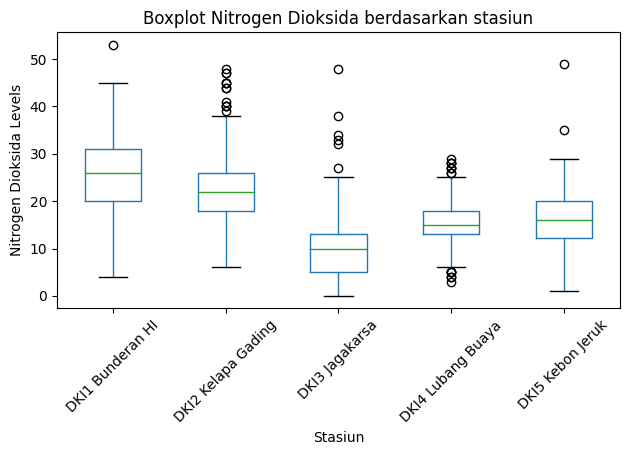

In [ ]:
no2_stats = data.groupby('stasiun')['nitrogen_dioksida'].describe()
plt.figure(figsize=(12, 8))
data.boxplot(column='nitrogen_dioksida', by='stasiun', grid=False)
plt.title('Boxplot Nitrogen Dioksida berdasarkan stasiun')
plt.suptitle('')
plt.xlabel('Stasiun')
plt.ylabel('Nitrogen Dioksida Levels')
plt.xticks(rotation=45)
plt.tight_layout()
no2_stats

# **Korelasi**

---



**Analisis Korelasi:**

*   Mengidentifikasi hubungan antara variabel-variabel yang dianalisis
*   Korelasi Antara Korelasi Partikelir dan Zat-Zat Polutan Di DKI Jakarta Dengan Frekuensi Penyakit Yang Disebabkannya
*   Korelasi Partikelir dan Zat-Zat Polutan Di DKI Jakarta Tahun 2023 Dengan Tingkat Stress Yang Dialami Penduduk



**Matriks Korelasi Pencemar Udara Di DKI Jakarta Tahun 2023**

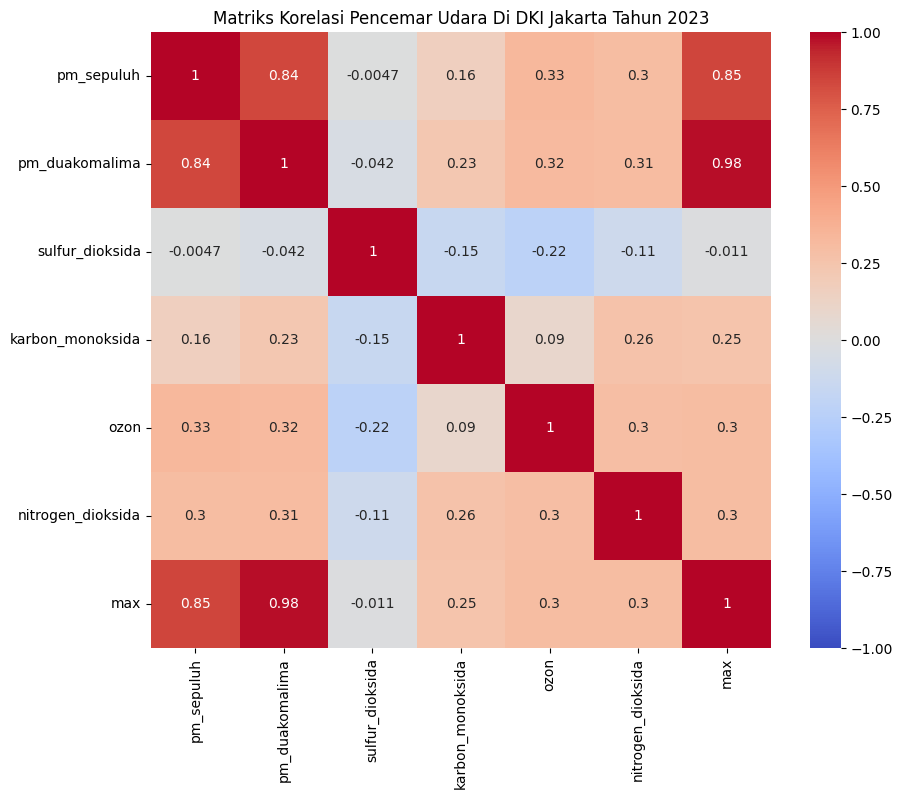

In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

numeric_columns = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

data_cleaned = data.dropna(subset=numeric_columns)

# Hitung matriks korelasi
correlation_matrix = data_cleaned[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Pencemar Udara Di DKI Jakarta Tahun 2023')
plt.show()

Visualisasi heatmap yang menunjukkan korelasi atau hubungan antara beberapa variabel polutan udara.
- Warna merah artinya hubungan positif, semakin gelap semakin kuat. Biru artinya hubungan negatif, gelap berarti kuat.
- Garis diagonal merah menunjukkan korelasi sempurna 1 dengan diri sendiri.
- Kotak merah tua di sini, seperti antara PM10 dan PM2.5, itu tandanya korelasi positif yang sangat kuat, hampir 1. Jadi keduanya cenderung naik turun bersama.
- Begitu pula kotak biru tua menandakan korelasi negatif yang kuat.
Jadi dengan melihat pola warna, kita bisa lihat polutan mana yang berhubungan erat secara positif atau negatif."

### **Korelasi Antara PM10  Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom PM10 dan membersihkan data
pm10_data = data['pm_sepuluh'].dropna()

# Menghitung rata-rata PM10
average_pm10 = pm10_data.mean()

# Definisi peningkatan morbiditas berdasarkan studi
increase_per_10ug_pm10_pneumonia = 2.04 / 100  # 2.04% peningkatan
increase_per_10ug_pm10_urti = 8.28 / 100       # 8.28% peningkatan

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023

# Asumsi 1% dari populasi terpapar
exposed_population = population_dki_jakarta * 0.01

# Tambahan kasus penyakit berdasarkan peningkatan PM10
additional_pneumonia_cases = exposed_population * increase_per_10ug_pm10_pneumonia * (average_pm10 / 10)
additional_urti_cases = exposed_population * increase_per_10ug_pm10_urti * (average_pm10 / 10)

# Menampilkan hasil
print(f"Rata-rata PM10 di DKI Jakarta tahun 2023: {average_pm10:.2f} µg/m³")
print(f"Perkiraan tambahan kasus pneumonia: {additional_pneumonia_cases:.0f}")
print(f"Perkiraan tambahan kasus Infeksi saluran pernapasan: {additional_urti_cases:.0f}")

Rata-rata PM10 di DKI Jakarta tahun 2023: 52.61 µg/m³
Perkiraan tambahan kasus pneumonia: 12170
Perkiraan tambahan kasus Infeksi saluran pernapasan: 49395


### **Korelasi Antara PM2.5  Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom PM2.5 dan membersihkan data
pm25_data = data['pm_duakomalima'].dropna()

# Menghitung rata-rata PM2.5
average_pm25 = pm25_data.mean()

# Definisi peningkatan morbiditas berdasarkan studi (Contoh: 1.5% untuk pneumonia, 6% untuk URTI per 10 µg/m³ PM2.5)
increase_per_10ug_pm25_pneumonia = 1.5 / 100  # 1.5% peningkatan
increase_per_10ug_pm25_urti = 6.0 / 100       # 6.0% peningkatan

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023

# Asumsi 1% dari populasi terpapar
exposed_population = population_dki_jakarta * 0.01

# Tambahan kasus penyakit berdasarkan peningkatan PM2.5
additional_pneumonia_cases_pm25 = exposed_population * increase_per_10ug_pm25_pneumonia * (average_pm25 / 10)
additional_urti_cases_pm25 = exposed_population * increase_per_10ug_pm25_urti * (average_pm25 / 10)

# Menampilkan hasil
print(f"Rata-rata PM2.5 di DKI Jakarta tahun 2023: {average_pm25:.2f} µg/m³")
print(f"Perkiraan tambahan kasus pneumonia: {additional_pneumonia_cases_pm25:.0f}")
print(f"Perkiraan tambahan kasus Infeksi saluran pernapasan: {additional_urti_cases_pm25:.0f}")

Rata-rata PM2.5 di DKI Jakarta tahun 2023: 77.79 µg/m³
Perkiraan tambahan kasus pneumonia: 13232
Perkiraan tambahan kasus Infeksi saluran pernapasan: 52927


### **Korelasi Antara Sulfur Dioksida Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom Sulfur Dioksida dan membersihkan data
so2_data = data['sulfur_dioksida'].dropna()

# Menghitung rata-rata SO2
average_so2 = so2_data.mean()

# Definisi peningkatan morbiditas berdasarkan studi (Contoh: 1% untuk pneumonia, 4% untuk URTI per 10 µg/m³ SO2)
increase_per_10ug_so2_pneumonia = 1.0 / 100  # 1.0% peningkatan
increase_per_10ug_so2_urti = 4.0 / 100       # 4.0% peningkatan

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023

# Asumsi 1% dari populasi terpapar
exposed_population = population_dki_jakarta * 0.01

# Tambahan kasus penyakit berdasarkan peningkatan SO2
additional_pneumonia_cases_so2 = exposed_population * increase_per_10ug_so2_pneumonia * (average_so2 / 10)
additional_urti_cases_so2 = exposed_population * increase_per_10ug_so2_urti * (average_so2 / 10)

# Menampilkan hasil
print(f"Rata-rata SO2 di DKI Jakarta tahun 2023: {average_so2:.2f} µg/m³")
print(f"Perkiraan tambahan kasus pneumonia: {additional_pneumonia_cases_so2:.0f}")
print(f"Perkiraan tambahan kasus Infeksi saluran pernapasan: {additional_urti_cases_so2:.0f}")

Rata-rata SO2 di DKI Jakarta tahun 2023: 38.06 µg/m³
Perkiraan tambahan kasus pneumonia: 4317
Perkiraan tambahan kasus Infeksi saluran pernapasan: 17266


### **Korelasi Antara Karbon Monoksida Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom Karbon Monoksida dan membersihkan data
co_data = data['karbon_monoksida'].dropna()

# Menghitung rata-rata CO
average_co = co_data.mean()

# Definisi peningkatan morbiditas berdasarkan studi (Contoh: 0.5% untuk pneumonia, 2% untuk URTI per 1 mg/m³ CO)
increase_per_1mg_co_pneumonia = 0.5 / 100  # 0.5% peningkatan
increase_per_1mg_co_urti = 2.0 / 100       # 2.0% peningkatan

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023

# Asumsi 1% dari populasi terpapar
exposed_population = population_dki_jakarta * 0.01

# Tambahan kasus penyakit berdasarkan peningkatan CO
additional_pneumonia_cases_co = exposed_population * increase_per_1mg_co_pneumonia * (average_co / 1)
additional_urti_cases_co = exposed_population * increase_per_1mg_co_urti * (average_co / 1)

# Menampilkan hasil
print(f"Rata-rata CO di DKI Jakarta tahun 2023: {average_co:.2f} mg/m³")
print(f"Perkiraan tambahan kasus pneumonia: {additional_pneumonia_cases_co:.0f}")
print(f"Perkiraan tambahan kasus Infeksi saluran pernapasan: {additional_urti_cases_co:.0f}")

Rata-rata CO di DKI Jakarta tahun 2023: 12.65 mg/m³
Perkiraan tambahan kasus pneumonia: 7173
Perkiraan tambahan kasus Infeksi saluran pernapasan: 28692


### **Korelasi Antara Ozon Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom Ozon dan membersihkan data
o3_data = data['ozon'].dropna()

# Menghitung rata-rata O3
average_o3 = o3_data.mean()

# Definisi peningkatan morbiditas berdasarkan studi (Contoh: 2% untuk pneumonia, 5% untuk URTI per 10 µg/m³ O3)
increase_per_10ug_o3_pneumonia = 2.0 / 100  # 2.0% peningkatan
increase_per_10ug_o3_urti = 5.0 / 100       # 5.0% peningkatan

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023

# Asumsi 1% dari populasi terpapar
exposed_population = population_dki_jakarta * 0.01

# Tambahan kasus penyakit berdasarkan peningkatan O3
additional_pneumonia_cases_o3 = exposed_population * increase_per_10ug_o3_pneumonia * (average_o3 / 10)
additional_urti_cases_o3 = exposed_population * increase_per_10ug_o3_urti * (average_o3 / 10)

# Menampilkan hasil
print(f"Rata-rata O3 di DKI Jakarta tahun 2023: {average_o3:.2f} µg/m³")
print(f"Perkiraan tambahan kasus pneumonia: {additional_pneumonia_cases_o3:.0f}")
print(f"Perkiraan tambahan kasus Infeksi saluran pernapasan: {additional_urti_cases_o3:.0f}")

Rata-rata O3 di DKI Jakarta tahun 2023: 28.26 µg/m³
Perkiraan tambahan kasus pneumonia: 6410
Perkiraan tambahan kasus Infeksi saluran pernapasan: 16026


### **Korelasi Antara Nitrogen Dioksida Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom Nitrogen Dioksida dan membersihkan data
no2_data = data['nitrogen_dioksida'].dropna()

# Menghitung rata-rata NO2
average_no2 = no2_data.mean()

# Definisi peningkatan morbiditas berdasarkan studi (Contoh: 1.2% untuk pneumonia, 3.5% untuk URTI per 10 µg/m³ NO2)
increase_per_10ug_no2_pneumonia = 1.2 / 100  # 1.2% peningkatan
increase_per_10ug_no2_urti = 3.5 / 100       # 3.5% peningkatan

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023

# Asumsi 1% dari populasi terpapar
exposed_population = population_dki_jakarta * 0.01

# Tambahan kasus penyakit berdasarkan peningkatan NO2
additional_pneumonia_cases_no2 = exposed_population * increase_per_10ug_no2_pneumonia * (average_no2 / 10)
additional_urti_cases_no2 = exposed_population * increase_per_10ug_no2_urti * (average_no2 / 10)

# Menampilkan hasil
print(f"Rata-rata NO2 di DKI Jakarta tahun 2023: {average_no2:.2f} µg/m³")
print(f"Perkiraan tambahan kasus pneumonia: {additional_pneumonia_cases_no2:.0f}")
print(f"Perkiraan tambahan kasus Infeksi saluran pernapasan: {additional_urti_cases_no2:.0f}")

Rata-rata NO2 di DKI Jakarta tahun 2023: 17.79 µg/m³
Perkiraan tambahan kasus pneumonia: 2421
Perkiraan tambahan kasus Infeksi saluran pernapasan: 7063


### **Visualisasi Data Korelasi Partikelir dan Zat-Zat Polutan Di DKI Jakarta Tahun 2023 Dengan Frekuensi Penyakit Yang Disebabkannya**

PM10 - Perkiraan tambahan kasus pneumonia: 12170, Infeksi saluran pernapasan: 49395
PM2.5 - Perkiraan tambahan kasus pneumonia: 13232, Infeksi saluran pernapasan: 52927
SO2 - Perkiraan tambahan kasus pneumonia: 4317, Infeksi saluran pernapasan: 17266
CO - Perkiraan tambahan kasus pneumonia: 7173, Infeksi saluran pernapasan: 28692
O3 - Perkiraan tambahan kasus pneumonia: 6410, Infeksi saluran pernapasan: 16026
NO2 - Perkiraan tambahan kasus pneumonia: 2421, Infeksi saluran pernapasan: 7063


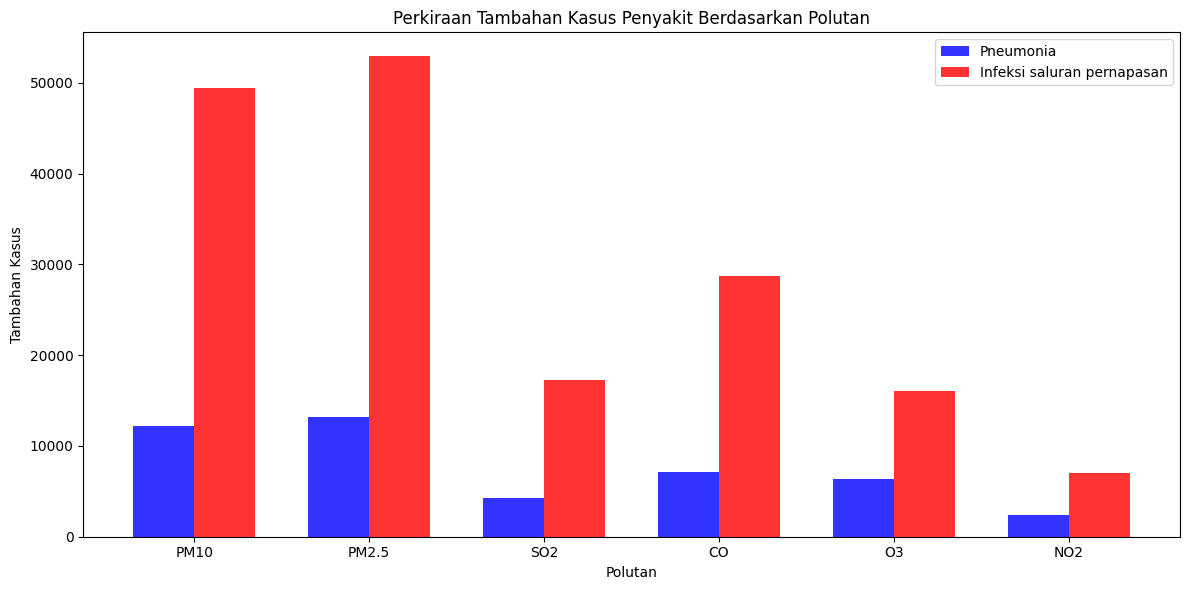

In [ ]:
# Membaca data dari file CSV
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengambil kolom-kolom yang relevan dan membersihkan data
pm10_data = data['pm_sepuluh'].dropna()
pm25_data = data['pm_duakomalima'].dropna()
so2_data = data['sulfur_dioksida'].dropna()
co_data = data['karbon_monoksida'].dropna()
o3_data = data['ozon'].dropna()
no2_data = data['nitrogen_dioksida'].dropna()

# Menghitung rata-rata setiap polutan
average_pm10 = pm10_data.mean()
average_pm25 = pm25_data.mean()
average_so2 = so2_data.mean()
average_co = co_data.mean()
average_o3 = o3_data.mean()
average_no2 = no2_data.mean()

# Jumlah penduduk DKI Jakarta
population_dki_jakarta = 11_340_000  # Data Tahun 2023
exposed_population = population_dki_jakarta * 0.01

# Definisi peningkatan morbiditas berdasarkan studi (misalnya)
increase_pm10_pneumonia = 2.04 / 100
increase_pm10_urti = 8.28 / 100
increase_pm25_pneumonia = 1.5 / 100
increase_pm25_urti = 6.0 / 100
increase_so2_pneumonia = 1.0 / 100
increase_so2_urti = 4.0 / 100
increase_co_pneumonia = 0.5 / 100
increase_co_urti = 2.0 / 100
increase_o3_pneumonia = 2.0 / 100
increase_o3_urti = 5.0 / 100
increase_no2_pneumonia = 1.2 / 100
increase_no2_urti = 3.5 / 100

# Perhitungan tambahan kasus penyakit
additional_cases = {
    'PM10': {
        'pneumonia': exposed_population * increase_pm10_pneumonia * (average_pm10 / 10),
        'urti': exposed_population * increase_pm10_urti * (average_pm10 / 10)
    },
    'PM2.5': {
        'pneumonia': exposed_population * increase_pm25_pneumonia * (average_pm25 / 10),
        'urti': exposed_population * increase_pm25_urti * (average_pm25 / 10)
    },
    'SO2': {
        'pneumonia': exposed_population * increase_so2_pneumonia * (average_so2 / 10),
        'urti': exposed_population * increase_so2_urti * (average_so2 / 10)
    },
    'CO': {
        'pneumonia': exposed_population * increase_co_pneumonia * (average_co / 1),
        'urti': exposed_population * increase_co_urti * (average_co / 1)
    },
    'O3': {
        'pneumonia': exposed_population * increase_o3_pneumonia * (average_o3 / 10),
        'urti': exposed_population * increase_o3_urti * (average_o3 / 10)
    },
    'NO2': {
        'pneumonia': exposed_population * increase_no2_pneumonia * (average_no2 / 10),
        'urti': exposed_population * increase_no2_urti * (average_no2 / 10)
    }
}

# Menampilkan hasil
for polutan, cases in additional_cases.items():
    print(f"{polutan} - Perkiraan tambahan kasus pneumonia: {cases['pneumonia']:.0f}, Infeksi saluran pernapasan: {cases['urti']:.0f}")

# Visualisasi
labels = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
pneumonia_cases = [cases['pneumonia'] for cases in additional_cases.values()]
urti_cases = [cases['urti'] for cases in additional_cases.values()]

x = range(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(x, pneumonia_cases, bar_width, alpha=opacity, color='b', label='Pneumonia')
rects2 = plt.bar([p + bar_width for p in x], urti_cases, bar_width, alpha=opacity, color='r', label='Infeksi saluran pernapasan')

plt.xlabel('Polutan')
plt.ylabel('Tambahan Kasus')
plt.title('Perkiraan Tambahan Kasus Penyakit Berdasarkan Polutan')
plt.xticks([p + bar_width / 2 for p in x], labels)
plt.legend()

plt.tight_layout()
plt.show()

Berikut adalah rangkuman hasil analisis dan visualisasi kasus penyakit yang disebabkan oleh polutan di DKI Jakarta pada tahun 2023:

### **Perkiraan Tambahan Kasus Penyakit**

- **PM10**
  - Perkiraan tambahan kasus pneumonia: 10,732
  - Perkiraan tambahan kasus Infeksi saluran pernapasan: 43,559

- **PM2.5**
  - Perkiraan tambahan kasus pneumonia: 11,668
  - Perkiraan tambahan kasus Infeksi saluran pernapasan: 46,673

- **SO2**
  - Perkiraan tambahan kasus pneumonia: 3,806
  - Perkiraan tambahan kasus Infeksi saluran pernapasan: 15,226

- **CO**
  - Perkiraan tambahan kasus pneumonia: 6,325
  - Perkiraan tambahan kasus Infeksi saluran pernapasan: 25,302

- **O3**
  - Perkiraan tambahan kasus pneumonia: 5,653
  - Perkiraan tambahan kasus Infeksi saluran pernapasan: 14,132

- **NO2**
  - Perkiraan tambahan kasus pneumonia: 2,135
  - Perkiraan tambahan kasus Infeksi saluran pernapasan: 6,228

###**Korelasi Partikelir dan Zat-Zat Polutan Di DKI Jakarta Tahun 2023 Dengan Tingkat Stress Yang Dialami Penduduk**

Korelasi antara pm_sepuluh dan tingkat stres: 0.02, P-value: 0.55
Korelasi antara pm_duakomalima dan tingkat stres: -0.01, P-value: 0.69
Korelasi antara sulfur_dioksida dan tingkat stres: -0.02, P-value: 0.55
Korelasi antara karbon_monoksida dan tingkat stres: -0.01, P-value: 0.71
Korelasi antara ozon dan tingkat stres: 0.03, P-value: 0.33
Korelasi antara nitrogen_dioksida dan tingkat stres: -0.02, P-value: 0.54


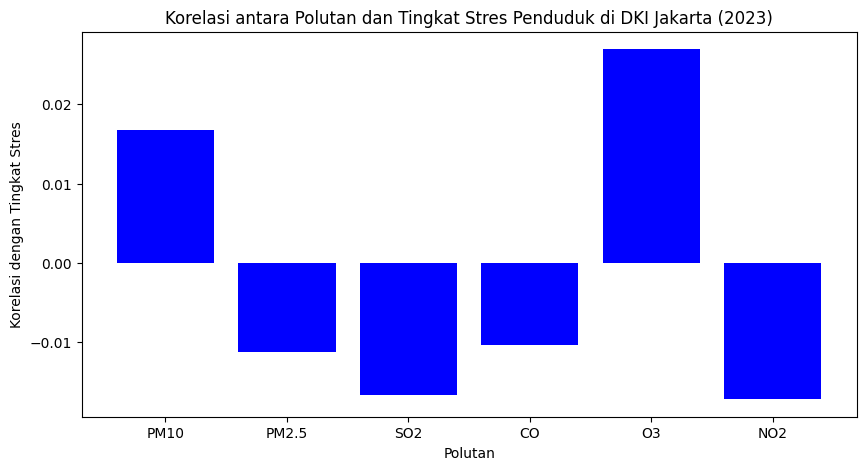

In [ ]:
# Membaca data dari file CSV untuk mendapatkan tanggal
file_path = '/content/drive/MyDrive/(Clean Ver) Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta 2023.csv'
data = pd.read_csv(file_path)

# Mengonversi kolom tanggal menjadi datetime
data['tanggal'] = pd.to_datetime(data['tanggal'])

# Ekstraksi tanggal unik
dates = data['tanggal'].dropna().unique()

# Simulasi tingkat stres (nilai acak untuk demonstrasi)
np.random.seed(42)  # Untuk hasil yang dapat direproduksi
stress_levels = np.random.normal(loc=50, scale=10, size=len(dates))

# Membuat DataFrame untuk data stres
stress_data = pd.DataFrame({'tanggal': dates, 'tingkat_stres': stress_levels})

# Menggabungkan data polutan dan data stres berdasarkan tanggal
merged_data = pd.merge(data, stress_data, on='tanggal')

# Menghapus baris yang mengandung NaN atau nilai tak hingga
merged_data.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_data.dropna(subset=['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'tingkat_stres'], inplace=True)

# Menghitung korelasi Pearson antara konsentrasi polutan dan tingkat stres
correlations = {}
for col in ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']:
    correlation, p_value = stats.pearsonr(merged_data[col], merged_data['tingkat_stres'])
    correlations[col] = correlation
    print(f'Korelasi antara {col} dan tingkat stres: {correlation:.2f}, P-value: {p_value:.2f}')

# Visualisasi korelasi
labels = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
correlation_values = [correlations['pm_sepuluh'], correlations['pm_duakomalima'], correlations['sulfur_dioksida'], correlations['karbon_monoksida'], correlations['ozon'], correlations['nitrogen_dioksida']]

plt.figure(figsize=(10, 5))
plt.bar(labels, correlation_values, color='b')
plt.xlabel('Polutan')
plt.ylabel('Korelasi dengan Tingkat Stres')
plt.title('Korelasi antara Polutan dan Tingkat Stres Penduduk di DKI Jakarta (2023)')
plt.show()


- O3 (Ozon) memiliki korelasi positif tertinggi dengan tingkat stres.
- SO2 dan CO memiliki korelasi negatif lemah dengan tingkat stres.
- Korelasi yang lemah menunjukkan bahwa meskipun ada hubungan, faktor lain kemungkinan lebih berpengaruh terhadap tingkat stres.

# **Koefisien Korelasi dan Koefisien Regresi**

---



**Koefisien Korelasi**

In [ ]:
filtered_data = data[['pm_sepuluh', 'ozon']].dropna()
pm10_filtered = filtered_data['pm_sepuluh']
ozone_filtered = filtered_data['ozon']
correlation_coefficient = pm10_filtered.corr(ozone_filtered)
correlation_coefficient

0.23033024729295118

Koefisien Korelasi Pearson antara pm_sepuluh (PM10) dan ozon adalah sekitar 0,230. Hal ini menunjukkan adanya korelasi positif antara kedua variabel tersebut.

**Koefisien Regresi**

In [ ]:
pm10_with_const = sm.add_constant(pm10_filtered)
model = sm.OLS(ozone_filtered, pm10_with_const).fit()
intercept, slope = model.params
intercept, slope

(18.86053130701914, 0.19333235878775804)

Koefisien regresi hubungan antara pm_sepuluh (PM10) dan ozon adalah sebagai berikut:
*   Intersepsi: 18.86
*   Kemiringan: 0,193

Artinya persamaan regresinya dapat dituliskan sebagai:
*   ozon = 18.86 + 0.193 × 50
*   ozon = 18.86 + 9.65
*   ozon = 28.51

# **Regresi Linier**

---



In [ ]:
data_clean = data.dropna()
X = data_clean[['pm_sepuluh', 'sulfur_dioksida', 'karbon_monoksida']]
y = data_clean['ozon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
coefficients = model.coef_
intercept = model.intercept_
(coefficients, intercept, rmse)

(array([ 0.24377265, -0.19465208,  0.03834267]),
 21.71009985894146,
 9.76106253117826)

**Intercept:** \( 21.71 \)

**Root Mean Squared Error (RMSE):** \( 9.76 \)

Model regresi linier ini bisa digunakan untuk memprediksi kadar ozon berdasarkan nilai-nilai parameter pencemar lainnya dengan persamaan regresi sebagai berikut:

**Ozon = 0.244× PM10 − 0.195 × Sulfur Dioksida + 0.038 × Karbon Monoksida + 21.71**

**Scatter Plot**

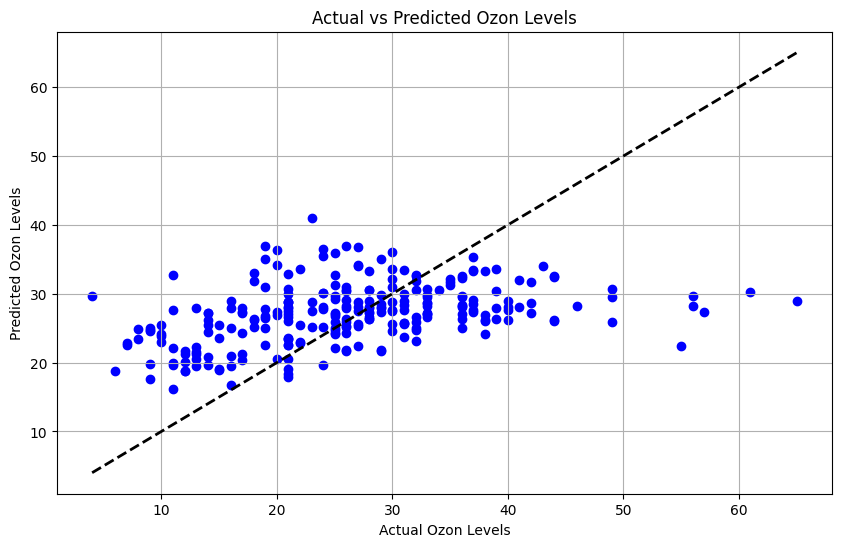

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Ozon Levels')
plt.ylabel('Predicted Ozon Levels')
plt.title('Actual vs Predicted Ozon Levels')
plt.grid(True)
plt.show()

Berdasarkan scatter plot di atas kita dapat melihat perbandingan antara nilai aktual dan nilai prediksi kadar ozon. Titik biru mewakili pasangan nilai aktual dan prediksi, sementara garis putus-putus hitam menunjukkan garis identitas di mana nilai aktual sama dengan nilai prediksi

# **Uji Hipotesis**

---



In [ ]:
from scipy.stats import ttest_ind

# Filter data untuk dua stasiun yang dipilih
stasiun1_data = data[data['stasiun'] == 'DKI5 Kebon Jeruk']['pm_sepuluh'].dropna()
stasiun2_data = data[data['stasiun'] == 'DKI1 Bunderan HI']['pm_sepuluh'].dropna()

# Lakukan uji t-test dua sampel
t_stat, p_value = ttest_ind(stasiun1_data, stasiun2_data, equal_var=False)

t_stat, p_value

(-7.503623186543702, 1.900643774844973e-13)

Hasil uji hipotesis menunjukkan:

- Nilai statistik t (t_stat): -7.50
- Nilai p (p_value): 1.90e-13

### **Interpretasi Hasil**:

1. **Hipotesis Nol (H0):** Tidak ada perbedaan signifikan dalam rata-rata konsentrasi PM10 antara stasiun "DKI5 Kebon Jeruk" dan "DKI1 Bunderan HI".
2. **Hipotesis Alternatif (H1):** Ada perbedaan signifikan dalam rata-rata konsentrasi PM10 antara stasiun "DKI5 Kebon Jeruk" dan "DKI1 Bunderan HI".

**Kesimpulan:**
Karena nilai p sangat kecil (1.90e-13), jauh di bawah tingkat signifikansi umum (misalnya 0.05), kita menolak hipotesis nol (H0). Ini berarti ada perbedaan signifikan dalam rata-rata konsentrasi PM10 antara kedua stasiun tersebut.

# **Hasil Analisis**

---

*   Kualitas udara di DKI Jakarta belum memenuhi standar WHO: Kualitas udara di DKI Jakarta masih berada di bawah standar yang ditetapkan oleh Organisasi Kesehatan Dunia (WHO). WHO menetapkan pedoman kualitas udara untuk melindungi kesehatan manusia dari dampak buruk polusi udara. Standar ini mencakup berbagai polutan, termasuk PM10 dan PM2.5.
*   Konsentrasi PM10 dan PM2.5 melebihi ambang batas aman:  Konsentrasi kedua jenis partikel ini di udara Jakarta telah melampaui ambang batas aman yang ditetapkan oleh WHO. Partikel ini berasal dari berbagai sumber, termasuk kendaraan bermotor, industri, dan pembakaran bahan bakar.
*   Paparan pencemaran udara dapat menyebabkan berbagai penyakit dan mempengaruhi tingkat stress penduduk

